## 一、二元逻辑回归的损失函数

损失函数：衡量参数的模型拟合**训练集**时产生的信息损失的大小，并以此衡量参数的优劣。因此，目标是求出**损失函数最小化**的参数（自变量）组合。

逻辑回归和线性回归是天生**欠拟合**的模型，需要控制过拟合的技术来调整模型，逻辑回归中的过拟合通过**正则化**来实现。

## 二、重要参数

### （一）penalty & C

正则化是用来**防止模型过拟合**的过程，常用的有**L1正则化**和**L2正则化**两种选项，分别通过在**损失函数**后加上参数向量的**L1范式**和**L2范式**的倍数来实现。这个增加的范式，被称为“**正则项**”，也被称为“**惩罚项**”。损失函数改变，基于损失函数的最优化来求解的参数取值必然改变，我们以此来调节模型拟合的程度。其中L1范式表现为参数向量中的**每个参数的绝对值之和**，L2范数表现为参数向量中的**每个参数的平方和的开方**值。

$$J(\theta)_{L1}=C*J(\theta)+\sum_{j=1}^{n}|\theta_j| (j≥1)$$

$$J(\theta)_{L2}=C*J(\theta)+\sqrt{\sum_{j=1}^{n}(\theta_j)^2} (j≥1)$$

**1.penalty**

（1）penalty='l2'（默认）：L2正则化，solver所有求解方式都可使用；<br>
（2）penalty='l1'：L1正则化，solver仅能使用求解方式'liblinear'和'saga'。

**2.C**（学习曲线调参）

**正则化强度的倒数**，必须是大于0的浮点数，默认1.0，集正则项与损失函数的比值是1:1。**C越小**，损失函数越小，模型对损失函数的惩罚越重，**正则化的效力越强**，**参数_θ_越小**，L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0。<br>
**L1正则化越强**，参数向量中就越多的参数为0，参数就越稀疏，选出来的**特征就越少**，以此来防止过拟合。因此，如果特征量很大，**数据维度很高，倾向于使用L1正则化**。由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded**嵌入法**来完成。<br>
L2正则化在加强的过程中，会尽量让每个特征对模型都有一些小的贡献，但携带信息少，对模型贡献不大的特征的参数会非常接近于0。通常来说，如果我们的主要目的只是为了**防止过拟合**，选择L2正则化就足够了。但是如果选择L2正则化后还是过拟合，模型在未知数据集上的效果表现很差，就可以考虑L1正则化。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #精确性

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X.shape

(569, 30)

In [4]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [5]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
lrl1.coef_

array([[ 4.00325977,  0.03194381, -0.13748977, -0.01623009,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50528835,  0.        , -0.07126986,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24583321, -0.12863125, -0.01440175,  0.        ,
         0.        , -2.03793712,  0.        ,  0.        ,  0.        ]])

In [6]:
(lrl1.coef_ != 0).sum(axis=1) #L1选了10个特征

array([10])

In [7]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_ #有的参数很小，但没有0

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

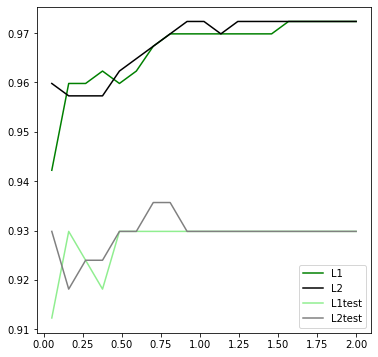

In [8]:
l1 = [] #L1训练集精确性
l2 = [] #L2训练集精确性
l1test = [] #L1测试集精确性
l2test = [] #L2测试集精确性

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,2,19):
    #实例化
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    #拟合
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain)) #L1训练集精确性
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest)) #L2测试集精确性
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain)) #L1测试集精确性
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest)) #L2测试集精确性

graph = [l1,l2,l1test,l2test] #纵坐标
color = ["green","black","lightgreen","gray"] #颜色
label = ["L1","L2","L1test","L2test"] #图例

plt.figure(figsize=(6,6)) #创建画布
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,2,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例在右下角
plt.show()

可见，至少在乳腺癌数据集下，两种正则化的结果区别不大。随着C的逐渐变大，正则化的强度越来越小，模型在训练集和测试集上的表现都呈**上升**趋势，直到C=0.8左右，训练集上的表现依然在走高，但L2模型在测试集上的表现开始下跌，这时候就是出现了过拟合。可以认为，C设定为0.8会比较好。

**3.逻辑回归中的特征工程**

（1）业务选择。

（2）特征创造（PCA和SVD）一般不用：不可解释。

（3）统计方法（过滤法）：可以使用，但不必要。逻辑回归对数据的总体分布和方差没有要求，也不需要排除特征之间的共线性。

（4）嵌入法embedded。**L1正则化**可以用来做特征选择，**结合嵌入法**，筛选出让模型十分高效的特征。

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score #交叉验证
from sklearn.feature_selection import SelectFromModel #嵌入法

In [10]:
data = load_breast_cancer()
X = data.data
y = data.target

In [11]:
X.shape

(569, 30)

In [12]:
LR_ = LR(solver="liblinear",C=0.8,random_state=420)
cross_val_score(LR_,X,y,cv=10).mean()

0.9508145363408522

In [13]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y) #使用L1范式筛选特征（norm_order=1），所以threshold不写
X_embedded.shape #30个降到了9个

(569, 9)

In [14]:
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9368107769423559

特征数量被减小到个位数，并且模型的效果却没有下降太多。

①继续调整：调节`SelectFromModel`中的参数threshold。

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


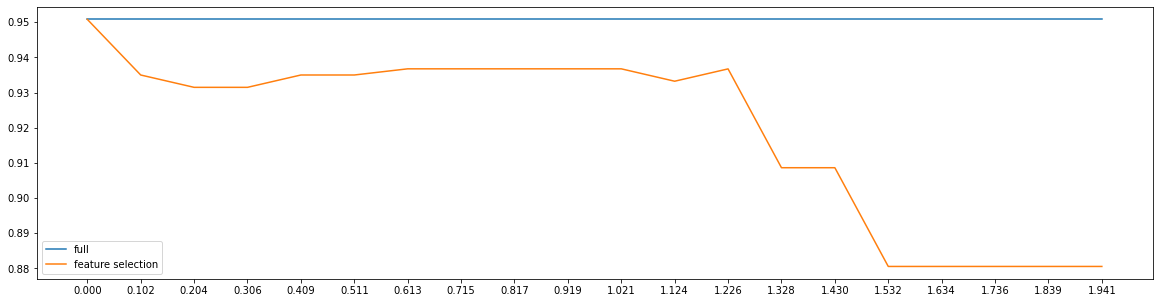

In [15]:
fullx = [] #完整特征矩阵的交叉验证结果
fsx = [] #使用嵌入法后的交叉验证结果

threshold = np.linspace(0,abs(LR_.fit(X,y).coef_).max(),20) #系数的绝对值越大，该特征对模型的影响越大

k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(X,y) #实例化+拟合
    fullx.append(cross_val_score(LR_,X,y,cv=5).mean()) #常数
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=5).mean())
    print((threshold[k],X_embedded.shape[1])) #打印阈值和使用嵌入法后的特征数量
    k+=1

plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

当threshold越来越大，被删除的特征越来越多，模型的效果也越来越差，模型效果最好的情况下需要保证有17个以上的特征。调整方式不正确。

②继续调整：调节`LogisticRegression`中的参数C。

0.9561090225563911 7.01


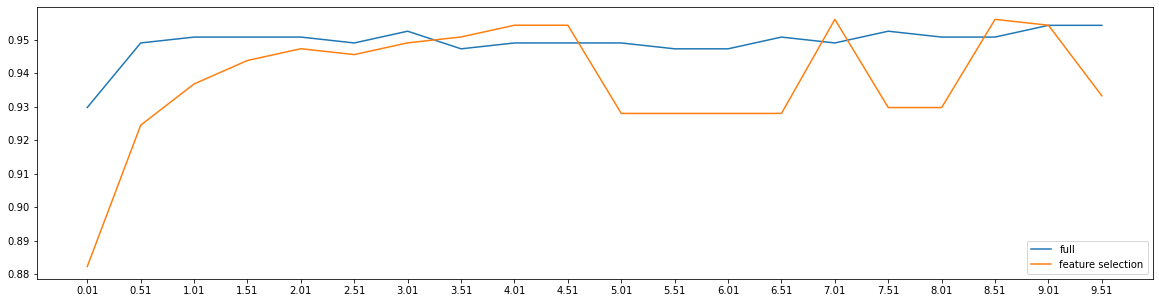

In [16]:
fullx = [] #调整C、完整特征矩阵的交叉验证结果
fsx = [] #调整C、嵌入法的交叉验证结果

C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420) #实例化
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean()) #完整特征矩阵精确度
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y) #嵌入法
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean()) #嵌入法后的精确度

print(max(fsx),C[fsx.index(max(fsx))]) #嵌入法的最大精确度、C值

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

继续细化C的学习曲线。

0.9561090225563911 6.069999999999999


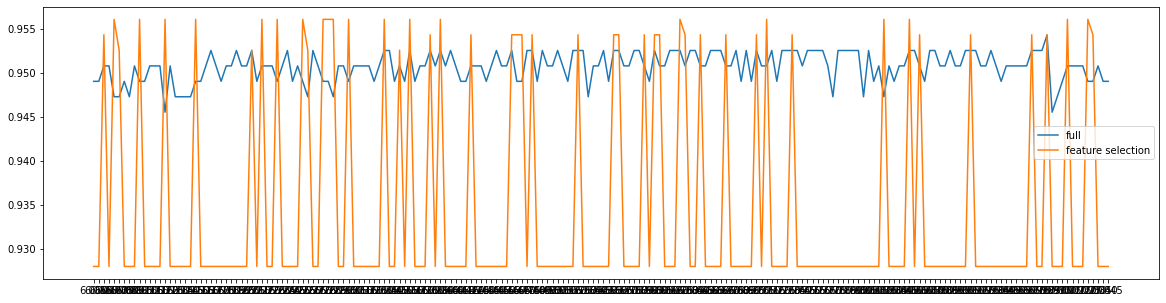

In [17]:
fullx = []
fsx = []
C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,X,y,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(LR_,X_embedded,y,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [18]:
#验证模型效果：L1范式降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,X,y,cv=10).mean()

0.9473057644110275

In [19]:
#验证模型效果：L1范式降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,y,cv=10).mean()

0.9561090225563911

In [20]:
X_embedded.shape

(569, 11)

实现了在嵌入法的前提下，保持模型拟合的高效。

（5）**系数（.coef_）累加法**：找出曲线由锐利变平滑的转折点，转折点之前被累加的特征都是需要的，转折点之后的都不需要。不过这种方法相对比较**麻烦**，因为要先对特征系数进行从大到小的排序，还要确保知道排序后的每个系数对应的原始特征的位置，才能够正确找出那些重要的特征。如果要使用这样的方法，不如直接使用嵌入法来得方便。

（6）**包装法**：包装法可以直接设定需要的特征个数，逻辑回归在现实中运用时，可能会有“需要5-8个变量”这种需求，包装法此时就非常方便了。

### （二）梯度下降的最大迭代次数：max_iter

**梯度**：在多元函数（损失函数J）上对各个自变量（θ）求偏导数，把求得的各个自变量的偏导数以向量的形式写出来，就是梯度。梯度是一个向量，有**大小**有**方向**。大小是偏导数组成的向量的大小（向量的模），方向是损失函数J的值增加最快的方向。

max_iter越大，代表步长越小，模型迭代时间越长，反之，则代表步长设置很大，模型迭代时间很短。

D:\22Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\22Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\22Anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


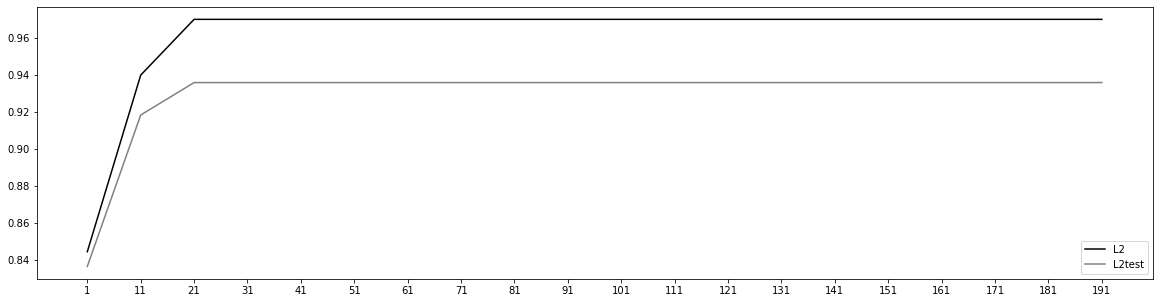

In [21]:
l2 = [] #L2训练集精确度
l2test = [] #L2测试集精确度

#使用原始特征矩阵
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [22]:
#可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数（24）
lr = LR(penalty="l2",solver="liblinear",C=0.8,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

当max_iter中限制的步数已经走完了，逻辑回归却还没有找到损失函数的最小值，参数θ的值还没有被收敛，sklearn就会弹出警告。但max_iter很大，意味着步长小，模型运行得会更加缓慢。虽然在梯度下降中追求的是损失函数的最小值，但这也可能意味着模型会**过拟合**（在训练集上表现得太好，在测试集上却不一定），因此，如果在max_iter报红条的情况下，模型的训练和预测效果都已经不错了，那就不需要再增大max_iter中的数目了。

### （三）二元回归与多元回归：solver & multi_class

**1.multi_class**：分类数量

（1）'ovr'：表示分类问题是**二分类**，或让模型使用"**一对多**"（把某种分类类型都看作1，其余的分类类型都为0值）的形式来处理多分类问题。<br>
（2）'multinomial'：表示处理**多分类**问题，这种输入在参数solver是'liblinear'时不可用。<br>
（3）'auto'（默认）：表示会根据**数据的分类情况**和**其他参数**来确定模型要处理的分类问题的类型。比如，如果数据是二分类或者solver的取值为'liblinear'，'auto'会默认选择'ovr',反之，则会选择'nultinomial'。

**2.solver**：求解器的选择

**求解器**|**'liblinear'**|**'lbfgs'**|**'newton-cg'**|**'sag'**|**'saga'**
-|-|-|-|-|-
求解器对应的求解方式|坐标下降法|拟牛顿法的一种，利用损失函数二阶导数矩阵（海森矩阵）来迭代优化损失函数|牛顿法的一种，利用损失函数二阶导数矩阵（海森矩阵）来迭代优化损失函数|随机平均梯度下降，与普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度|随机平均梯度下降的进化，稀疏多项逻辑回归的首选
支持的惩罚项|L1, L2|L2|L2|L2|L1, L2
**支持的回归类型**
multinomial|否(不利)|是|是|是|是
ovr|是|是|是|是|是
二分类|是|是|是|是|是
**求解器的效果**
惩罚截距|是(不利)|否|否|否|否
在大型数据集上更快|否(不利)|否(不利)|否(不利)|是|是
对为标准化的数据集有用|是|是|是|否(不利)|否(不利)

**3.在鸢尾花数据集上，multinomial和ovr的区别**

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42, multi_class=multi_class).fit(iris.data, iris.target)
    #用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示字符串。
    #字符串后的%后使用元组来容纳变量，字符串中有几个%，元组中就需要有几个变量。
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target),multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


D:\22Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\22Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\22Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\22Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### （四）样本不平衡：class_weight

样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例，或误分类的代价很高，即我们想要捕捉出某种特定的分类的时候的状况。因此要使用参数**class_weight**对样本标签进行一定的均衡，给少量的标签更多的权重，让**模型更偏向少数类**，向捕获少数类的方向建模。

但是，sklearn当中的参数class_weight变幻莫测，很难去找出这个参数引导的模型趋势，或者画出学习曲线来评估参数的效果，因此可以说是非常难用。我们有着处理样本不均衡的各种方法，其中主流的是**采样法**，是通过**重复样本**的方式来平衡标签，可以进行**上采样（增加少数类的样本）**，比如SMOTE，或者**下采样（减少多数类的样本）**。对于逻辑回归来说，**上采样**是最好的办法。